In [1]:
from google.colab import drive
import os
import numpy as np
from PIL import Image, ImageOps, ImageFilter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset
dataset_path = '/content/drive/My Drive/Machine learning/Plant disease/PlantVillage/'
categories = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']


Mounted at /content/drive


In [2]:
# Load more images for improved model accuracy
sample_images = {}
max_images_per_category = 500  # Increase image limit

for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)[:max_images_per_category]  # Load up to 500 images per category
    sample_images[category] = [os.path.join(category_path, img) for img in images]

# Enhanced feature extraction function
def extract_features(image_path):
    image = Image.open(image_path).convert("RGB").resize((64, 64))  # Resize for consistency

    # Average color (RGB channels)
    avg_color = np.mean(np.array(image), axis=(0, 1))

    # Edge detection on grayscale version
    gray_image = ImageOps.grayscale(image)
    edges = np.array(gray_image.filter(ImageFilter.FIND_EDGES)).flatten()  # Flatten edges for feature array

    # Combine average color and edges as features
    features = np.hstack((avg_color, edges))
    return features

# Prepare dataset
X = []  # Features
y = []  # Labels

# Extract features and labels
for label, category in enumerate(categories):
    for image_path in sample_images[category]:
        features = extract_features(image_path)
        X.append(features)
        y.append(label)

X = np.array(X)
y = np.array(y)


In [3]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the CART model
cart_model = DecisionTreeClassifier(criterion='gini', max_depth=5)  # Adjust depth for better accuracy if needed
cart_model.fit(X_train, y_train)

# Evaluate the model
accuracy = cart_model.score(X_test, y_test)



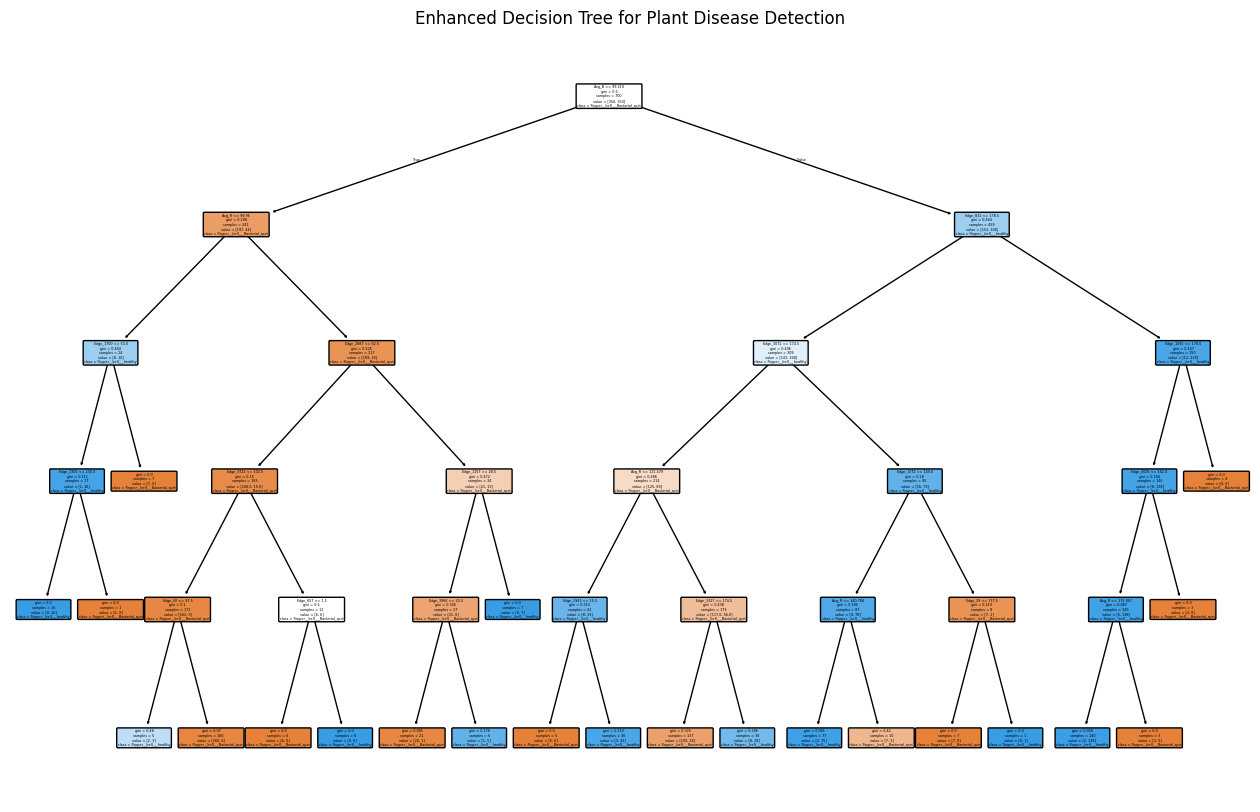

In [4]:
# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(cart_model, filled=True, rounded=True, class_names=categories,
          feature_names=["Avg_R", "Avg_G", "Avg_B"] + [f"Edge_{i}" for i in range(X.shape[1] - 3)])
plt.title("Enhanced Decision Tree for Plant Disease Detection")
plt.show()
